In [1]:
import pandas as pd

In [3]:
df = pd.read_excel("Adidas US Sales Datasets.xlsx")

In [4]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [10]:
#Check the datatypes of the columns
df.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [6]:
#Check count of missing values
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [7]:
# Check count of duplicate records
df.duplicated().sum()

0

In [8]:
# Check unique values in key columns
df.nunique()

Retailer               6
Retailer ID            4
Invoice Date         724
Region                 5
State                 50
City                  52
Product                6
Price per Unit       146
Units Sold           361
Total Sales         3512
Operating Profit    6510
Operating Margin     127
Sales Method           3
dtype: int64

In [11]:

df.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store


In [12]:
# Total sales Revenue
df['Total Sales'].sum()

899902125.0

In [13]:
#Average operating margin
df['Operating Margin'].mean()

0.42299129353233833

In [15]:
#Monthly sales trend (highest & Lowest Months)
monthly_sales = df.groupby(df['Invoice Date'].dt.month)['Total Sales'].sum()
monthly_sales.idxmax(), monthly_sales.max(), monthly_sales.idxmin(), monthly_sales.min()

(7, 95480694.0, 3, 56809109.0)

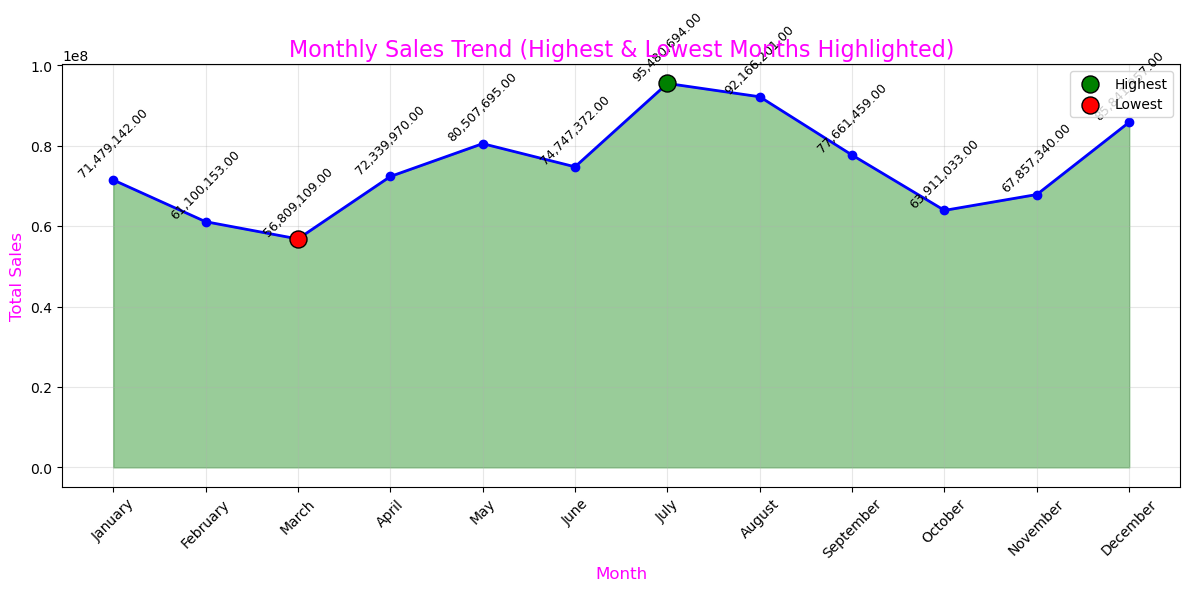

In [52]:
import matplotlib.pyplot as plt
import calendar

# --- 1. Aggregate total sales by month ---
monthly_sales = df.groupby(df['Invoice Date'].dt.month)['Total Sales'].sum()

# --- 2. Prepare month names ---
month_names = [calendar.month_name[m] for m in monthly_sales.index]

# --- 3. Create the Area chart with markers ---
plt.figure(figsize=(12, 6))
plt.fill_between(month_names, monthly_sales.values, alpha=0.4, color='green')       # area shading
plt.plot(month_names, monthly_sales.values, marker='o', linewidth=2, color='blue') # line with markers

# --- 4. Annotate each point with its sales value (2 decimals) ---
for x, y in zip(month_names, monthly_sales.values):
    plt.text(x, y, f"{y:,.2f}",   # <-- now rounded to 2 decimal places
             ha='center', va='bottom', fontsize=9, rotation=45)

# --- 5. Add titles & labels ---
plt.title('Monthly Sales Trend (Highest & Lowest Months Highlighted)', fontsize=16, color='magenta')
plt.xlabel('Month', fontsize=12, color='magenta')
plt.ylabel('Total Sales', fontsize=12, color='magenta')
plt.xticks(rotation=45)

# --- 6. Highlight highest & lowest months ---
highest_month = monthly_sales.idxmax()
lowest_month = monthly_sales.idxmin()

plt.scatter(calendar.month_name[highest_month], monthly_sales.max(),
            color='green', s=150, edgecolor='black', zorder=5, label='Highest')
plt.scatter(calendar.month_name[lowest_month], monthly_sales.min(),
            color='red', s=150, edgecolor='black', zorder=5, label='Lowest')

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
#Total operating profit by year
df.groupby(df['Invoice Date'].dt.year)['Operating Profit'].sum()

Invoice Date
2020    6.337566e+07
2021    2.687591e+08
Name: Operating Profit, dtype: float64

In [28]:
#Total operating profit by month
df.groupby(df['Invoice Date'].dt.month)['Operating Profit'].sum()

Invoice Date
1     25141934.51
2     21392736.70
3     20439788.00
4     27559237.31
5     29946255.33
6     26714715.92
7     34054898.59
8     34451440.30
9     31009586.73
10    25078444.60
11    24755521.43
12    31590202.03
Name: Operating Profit, dtype: float64

In [29]:
#Monthly operating profit trend (highest & Lowest Months)
monthly_profit = df.groupby(df['Invoice Date'].dt.month)['Operating Profit'].sum()
monthly_profit.idxmax(), monthly_profit.max(), monthly_profit.idxmin(), monthly_profit.min()

(8, 34451440.300000004, 3, 20439788.0)

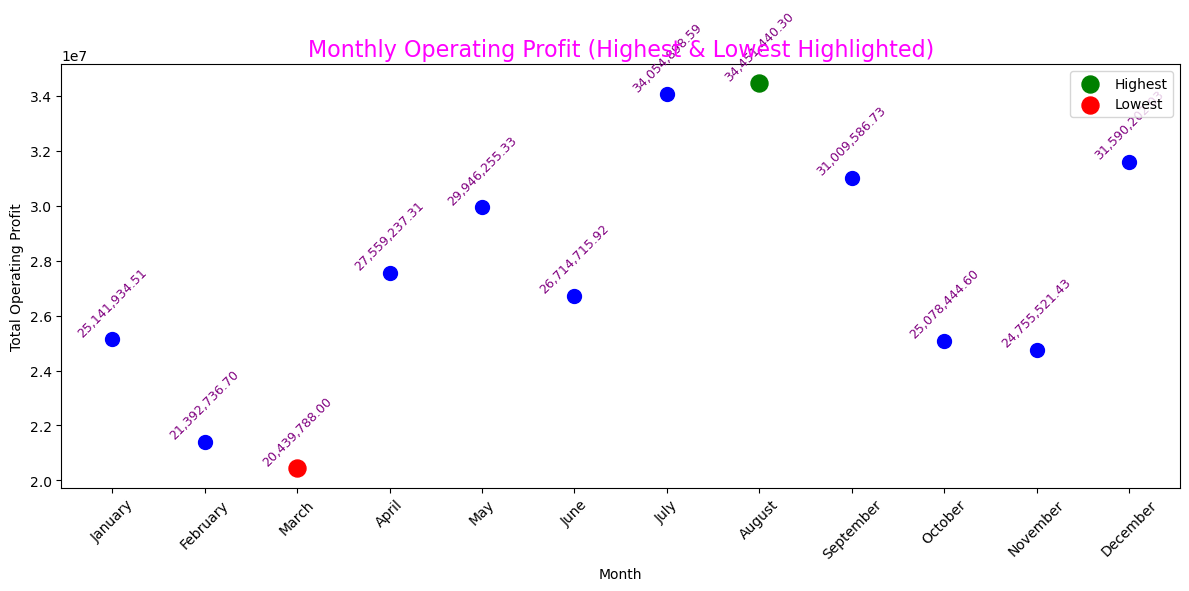

In [42]:
# Representing the months with highest and lowest operating profit using a scatter plot
plt.figure(figsize=(12,6))
plt.scatter(month_names, monthly_profit.values, s=100, c='blue')

# Highlight highest & lowest
plt.scatter(calendar.month_name[monthly_profit.idxmax()], monthly_profit.max(), c='green', s=150, label='Highest')
plt.scatter(calendar.month_name[monthly_profit.idxmin()], monthly_profit.min(), c='red', s=150, label='Lowest')

# Annotate all points
for x, y in zip(month_names, monthly_profit.values):
    plt.text(x, y, f"{y:,.2f}", ha='center', va='bottom', fontsize=9, rotation=45, color='purple')

plt.title('Monthly Operating Profit (Highest & Lowest Highlighted)', fontsize=16, color='magenta')
plt.xlabel('Month')
plt.ylabel('Total Operating Profit')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
# Compute correlation between all Total sales and operating profit
corr = df[['Total Sales', 'Operating Profit']].corr()
print(corr)

                  Total Sales  Operating Profit
Total Sales          1.000000          0.956307
Operating Profit     0.956307          1.000000


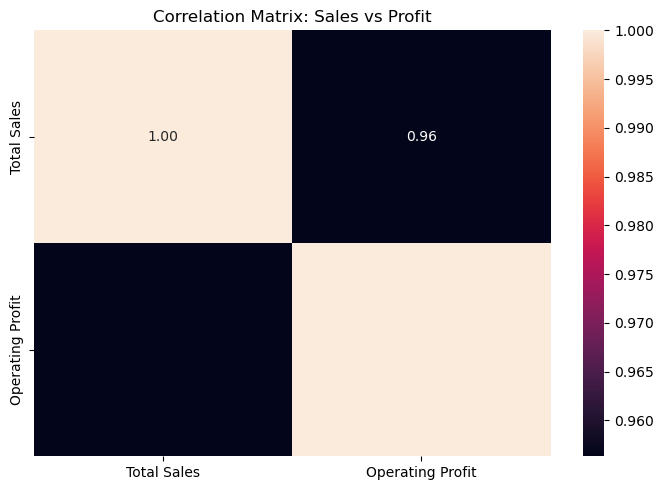

In [59]:
#Represent the corelation above using a heatmap
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(df[['Total Sales', 'Operating Profit']].corr(),
            annot=True, fmt=".2f", cmap="rocket")
plt.title('Correlation Matrix: Sales vs Profit')
plt.tight_layout()
plt.show()

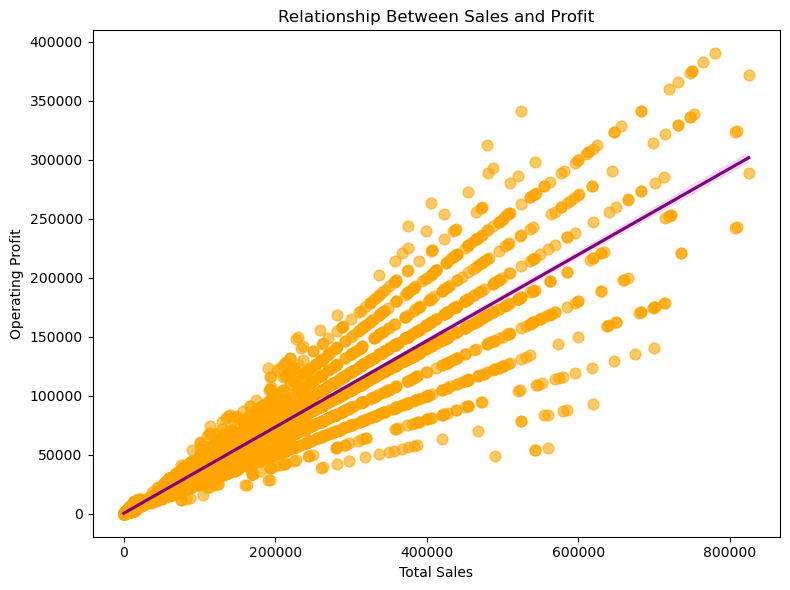

In [60]:
#Representing the corelation using a scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x='Total Sales',
            y='Operating Profit',
            data=df,
            scatter_kws={'color': 'orange', 's': 60, 'alpha': 0.6},  # dot color
            line_kws={'color': 'purple'})                            # regression line color
plt.title('Relationship Between Sales and Profit')
plt.xlabel('Total Sales')
plt.ylabel('Operating Profit')
plt.tight_layout()
plt.show()

In [65]:
#Sales trend by month
df.set_index('Invoice Date').resample('M')['Total Sales'].sum()

Invoice Date
2020-01-01    16253746.0
2020-02-01    14997988.0
2020-03-01    17660577.0
2020-04-01    24607006.0
2020-05-01    16918014.0
2020-06-01     8829819.0
2020-07-01    17146013.0
2020-08-01    19877980.0
2020-09-01    18304436.0
2020-10-01    10836269.0
2020-11-01     8622300.0
2020-12-01     8026527.0
2021-01-01    55225396.0
2021-02-01    46102165.0
2021-03-01    39148532.0
2021-04-01    47732964.0
2021-05-01    63589681.0
2021-06-01    65917553.0
2021-07-01    78334681.0
2021-08-01    72288221.0
2021-09-01    59357023.0
2021-10-01    53074764.0
2021-11-01    59235040.0
2021-12-01    77815430.0
Freq: MS, Name: Total Sales, dtype: float64

In [67]:
#Sales by day of the week
df['Invoice Date'].dt.day_name().value_counts()

Invoice Date
Tuesday      1490
Friday       1426
Saturday     1407
Sunday       1390
Wednesday    1346
Thursday     1343
Monday       1246
Name: count, dtype: int64

<Axes: xlabel='Invoice Date'>

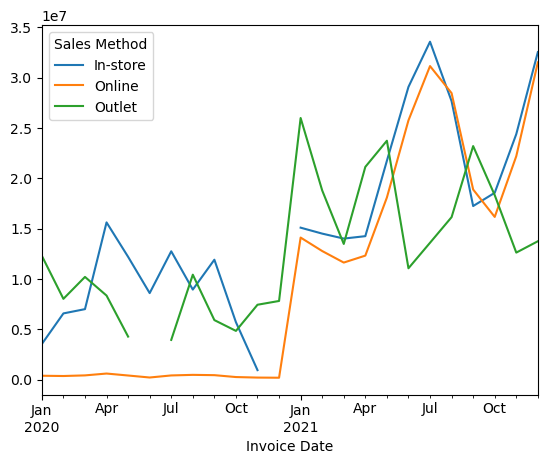

In [72]:
#instore vs online sales over time
df.groupby([df['Invoice Date'].dt.to_period('M'),'Sales Method'])['Total Sales'].sum().unstack().plot(kind='line')

In [73]:
df.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store


In [75]:
#Region with the highest total sales
df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
South        144663181.0
Midwest      135800459.0
Name: Total Sales, dtype: float64

In [80]:
# Top 5 states by sales
df.groupby('State')['Total Sales'].sum().nlargest(5)

State
New York          64229039.0
California        60174133.0
Florida           59283714.0
Texas             46359746.0
South Carolina    29285637.0
Name: Total Sales, dtype: float64